# 초기 설정 및 모듈 불러오기

In [1]:
import warnings 

warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

plt.rc('font', family='Malgun Gothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

# COVID19 진행 상황

In [3]:
# raw 코로나 데이터 불러오기

covid_data=pd.read_csv('data/Covid_case.csv')

In [4]:
# 필요 칼럼만 추출
# 코로나 일별 확진자 수 칼럼 추가
# 정수형 stateDt를 Datetime형 stateDt로 변환 후 인덱스로 설정

covid_data['daily_decideCnt']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','daily_decideCnt','decideCnt','deathCnt']]
covid_data_new.index=pd.to_datetime(covid_data_new['stateDt'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('stateDt',axis=1)
covid_data_new['year']=covid_data_new.index.year
covid_data_new['month']=covid_data_new.index.month
covid_data_new.head()

,daily_decideCnt,decideCnt,deathCnt,year,month
stateDt,,,,,
2021-09-25,NaN,298401,2441.0,2021,9
2021-09-24,3269.0,295132,2434.0,2021,9
2021-09-23,2433.0,292699,2427.0,2021,9
2021-09-22,1716.0,290983,2419.0,2021,9
2021-09-21,1720.0,289263,2413.0,2021,9


In [5]:
# 일별 확진자수 분포 확인

covid_data_new.describe().daily_decideCnt

count     603.000000
mean      494.860697
std       552.512534
min         0.000000
25%        61.500000
50%       363.000000
75%       645.500000
max      3269.000000
Name: daily_decideCnt, dtype: float64

<AxesSubplot:title={'center':'The Cumulative Trend Of COVID-19 Confirmed cases'}, xlabel='stateDt', ylabel='decideCnt'>

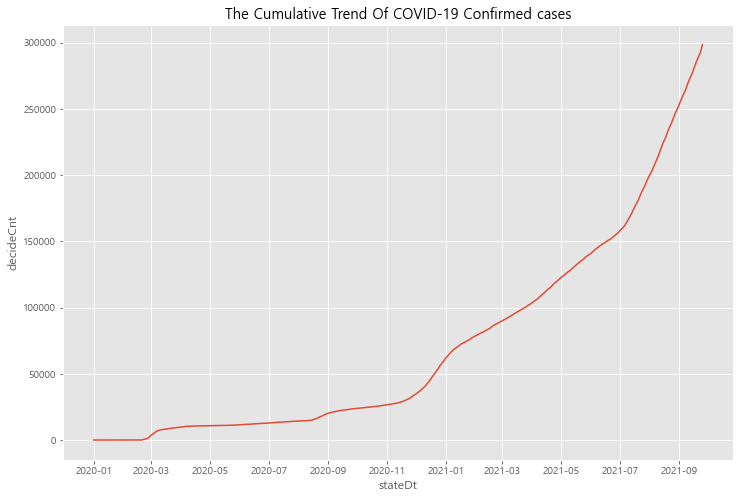

In [6]:
# 코로나 누적 확진자 시각화

plt.figure(figsize=(12,8))
plt.title('The Cumulative Trend Of COVID-19 Confirmed cases')
sns.lineplot(data=covid_data_new, x='stateDt', y='decideCnt')

<AxesSubplot:title={'center':'Daily Trend Of COVID-19 Confirmed Cases'}, xlabel='stateDt', ylabel='daily_decideCnt'>

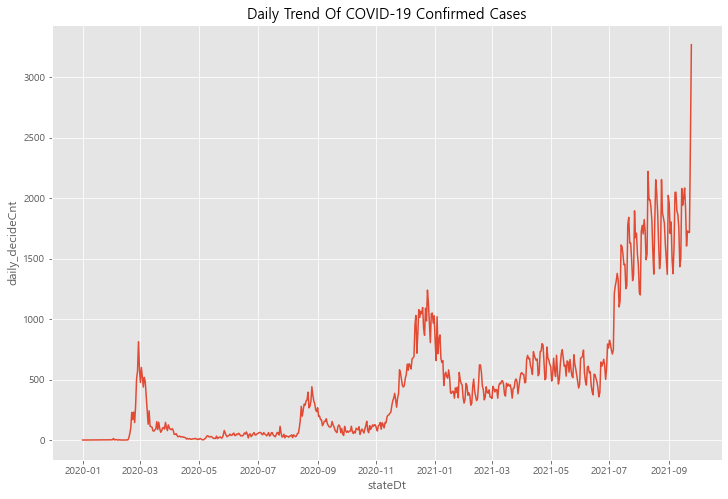

In [7]:
# 코로나 일별 확진자 시각화

plt.figure(figsize=(12,8))
plt.title('Daily Trend Of COVID-19 Confirmed Cases')
sns.lineplot(data=covid_data_new, x='stateDt', y='daily_decideCnt')

위 세가지 그래프의 일별/년도별 확진자 확인 결과, 2020년 3월, 2020년 8월, 2020년 12월, 2021년 8월 총 4차례의 대유행이 발생 했음을 알 수 있다

In [8]:
# 대유행 기간 확진자 수 추출

covid_data_1st_pandemic=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==2)|(covid_data_new.month==3))]
covid_data_2nd_pandemic=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==8)|(covid_data_new.month==9))]
covid_data_3rd_pandemic=covid_data_new[((covid_data_new.year==2020) & ((covid_data_new.month==12)|(covid_data_new.month==11)))|
                ((covid_data_new.year==2021)&((covid_data_new.month==1)|(covid_data_new.month==2)))]
covid_data_4th_pandemic=covid_data_new[(covid_data_new.year==2021) & ((covid_data_new.month==6)|(covid_data_new.month==7)|(covid_data_new.month==8)|(covid_data_new.month==9))]

<AxesSubplot:title={'center':'Trend Of The 4th Pandemic'}, xlabel='stateDt', ylabel='daily_decideCnt'>

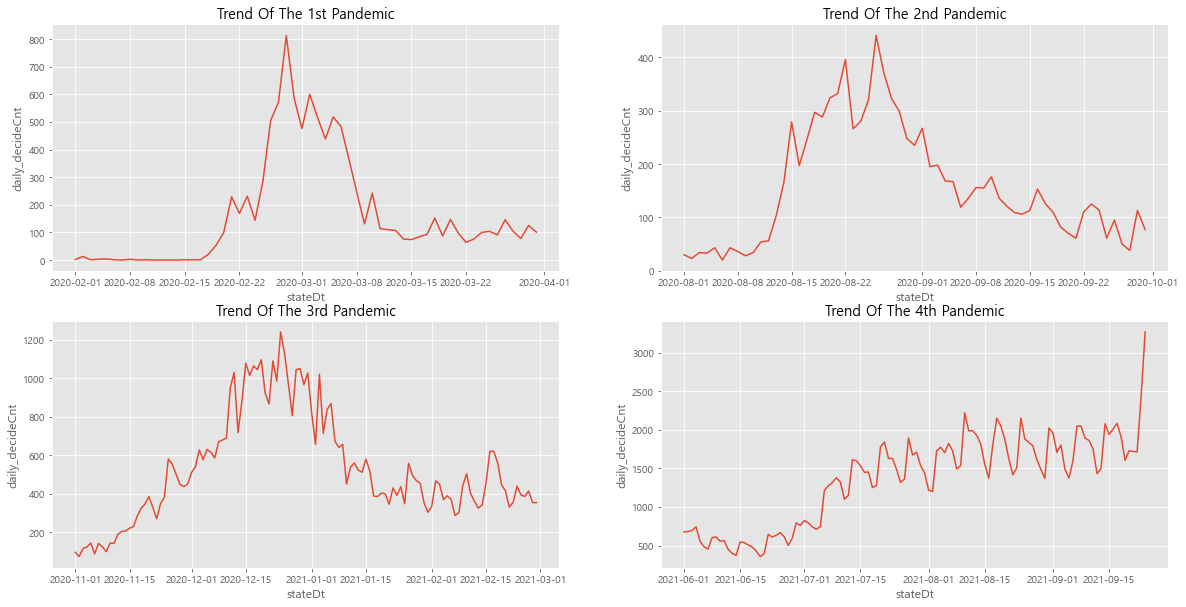

In [9]:
# 대유행 기간 확진자 수 시각화

fig, axes=plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20,10)

axes[0][0].set(title='Trend Of The 1st Pandemic')
axes[0][1].set(title='Trend Of The 2nd Pandemic')
axes[1][0].set(title='Trend Of The 3rd Pandemic')
axes[1][1].set(title='Trend Of The 4th Pandemic')

sns.lineplot(data=covid_data_1st_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[0][0])
sns.lineplot(data=covid_data_2nd_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[0][1])
sns.lineplot(data=covid_data_3rd_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[1][0])
sns.lineplot(data=covid_data_4th_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[1][1])

4차례의 대유행이 시각화로 뚜렷하게 표현되며, 4차 대유행은 여전히 진행중이다.

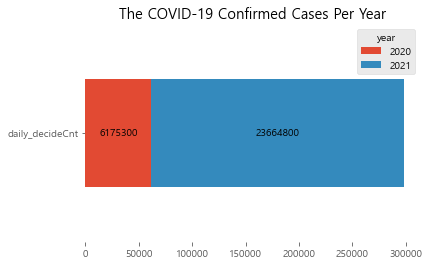

In [10]:
# 코로나 년도별 확진자 시각화

year_covid=pd.DataFrame(covid_data_new.groupby('year')['daily_decideCnt'].sum()).T

ax = year_covid.plot(kind='barh', stacked=True, title='The COVID-19 Confirmed Cases Per Year', rot=0)
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.f"%(width*100), xy=(left+width/2, bottom+height/2), ha='center', va='center')
plt.box(False)
plt.show()

# 고속도로 이용 교통량 추이

In [11]:
# 년도별/분기별 교통량 데이터 가져오기

traffic_2018_01=pd.read_csv('data/2018_01분기.csv',encoding='cp949')
traffic_2018_02=pd.read_csv('data/2018_02분기.csv',encoding='cp949')
traffic_2018_03=pd.read_csv('data/2018_03분기.csv',encoding='cp949')
traffic_2018_04=pd.read_csv('data/2018_04분기.csv',encoding='cp949')
traffic_2019_01=pd.read_csv('data/2019_01분기.csv',encoding='cp949')
traffic_2019_02=pd.read_csv('data/2019_02분기.csv',encoding='cp949')
traffic_2019_03=pd.read_csv('data/2019_03분기.csv',encoding='cp949')
traffic_2019_04=pd.read_csv('data/2019_04분기.csv',encoding='cp949')
traffic_2020_01=pd.read_csv('data/2020_01분기.csv',encoding='cp949')
traffic_2020_02=pd.read_csv('data/2020_02분기.csv',encoding='cp949')
traffic_2020_03=pd.read_csv('data/2020_03분기.csv',encoding='cp949')
traffic_2020_04=pd.read_csv('data/2020_04분기.csv',encoding='cp949')
traffic_2021_01=pd.read_csv('data/2021_01분기.csv',encoding='cp949')
traffic_2021_02=pd.read_csv('data/2021_02분기.csv',encoding='cp949')

In [12]:
# 분기별 데이터 하나의 데이터로 합치기

traffic_data=pd.concat([traffic_2018_01,traffic_2018_02,traffic_2018_03,traffic_2018_04,
                        traffic_2019_01,traffic_2019_02,traffic_2019_03,traffic_2019_04,
                        traffic_2020_01,traffic_2020_02,traffic_2020_03,traffic_2020_04,
                        traffic_2021_01,traffic_2021_02])
# 명칭이 불규칙하여 통일

traffic_data=traffic_data.replace('서서울영업소','서서울')
traffic_data=traffic_data.replace('서울영업소','서울')
traffic_data=traffic_data.replace('서대구영업소','서대구')
traffic_data=traffic_data.replace('북대구영업소','북대구')
traffic_data=traffic_data.replace('남대구영업소','남대구')
traffic_data=traffic_data.replace('북강릉영업소','북강릉')
traffic_data=traffic_data.replace('남강릉영업소','남강릉')
traffic_data=traffic_data.replace('강릉영업소','강릉')

In [13]:
def day_of_week(traffic_data): #요일 추가 함수
    traffic_data.index=pd.to_datetime(traffic_data.index, format='%Y%m%d')
    traffic_data['year']=traffic_data.index.year 
    traffic_data['month']=traffic_data.index.month
    days={0:'MON',1:'TUE',2:'WED',3:'THU',4:'FRI',5:'SAT',6:'SUN'}
    traffic_data['day_of_week']=traffic_data.index.dayofweek 
    traffic_data.day_of_week=traffic_data.day_of_week.apply(lambda x : days[x])
    return traffic_data

In [14]:
# 필요 칼럼만 추출
# 정수형 집계일자를 Datetime형 집계일자로 변환 후 인덱스로 설정
# 일별 년도/월/요일 칼럼 추가

traffic_data.index=traffic_data.집계일자
traffic_data=traffic_data.drop('집계일자',axis=1)
traffic_data=traffic_data[['영업소명','1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량']]
traffic_data=day_of_week(traffic_data)
traffic_data.head()

,영업소명,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,,
2018-01-01,가락,211,6,6,21,27,4,275,2018,1,MON
2018-01-01,가락,615,14,5,14,96,26,770,2018,1,MON
2018-01-01,가락(개),2358,31,48,57,131,273,2898,2018,1,MON
2018-01-01,가락(개),7148,27,71,27,267,378,7918,2018,1,MON
2018-01-01,가락(개),2946,29,52,48,150,357,3582,2018,1,MON


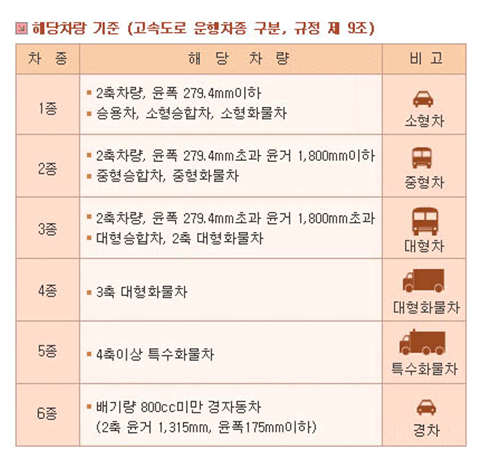

## 전국 교통량 분석

In [15]:
# 모든 곳의 톨게이트에 대한 교통량 합산

traffic_data_total=traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
traffic_data_total=day_of_week(traffic_data_total)
# 년도별 저장

traffic_data_2018=traffic_data_total[traffic_data_total.year==2018]
traffic_data_2019=traffic_data_total[traffic_data_total.year==2019]
traffic_data_2020=traffic_data_total[traffic_data_total.year==2020]
traffic_data_2021=traffic_data_total[traffic_data_total.year==2021]

# 코로나 기간 저장

traffic_data_2020_2021=traffic_data_total[(traffic_data_total.year==2020)|(traffic_data_total.year==2021)]

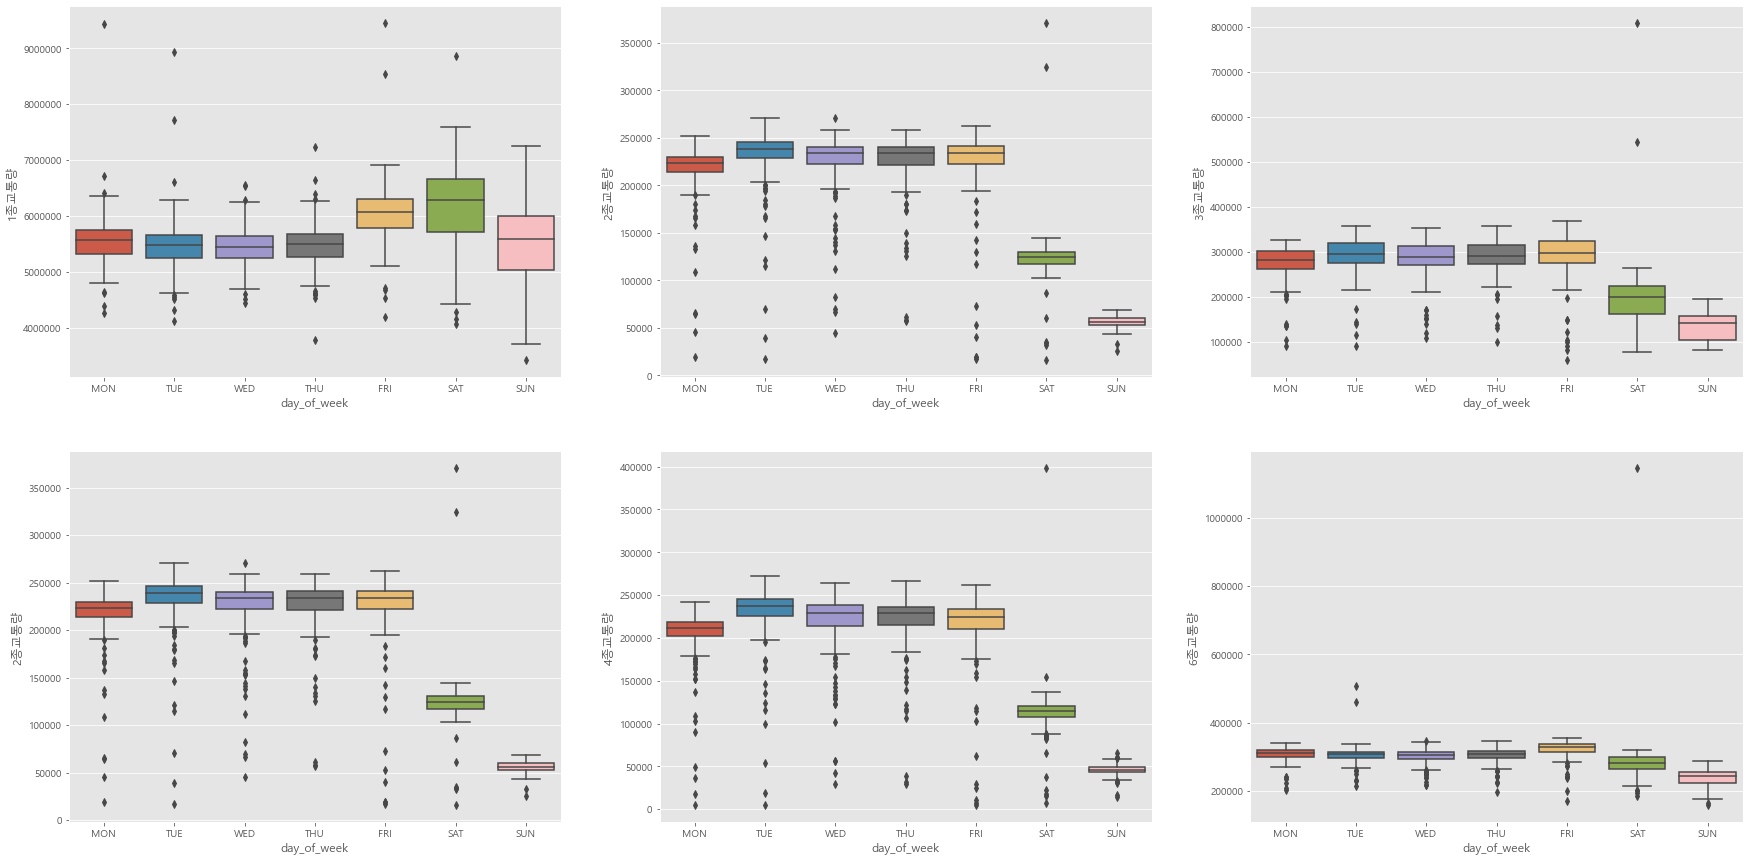

In [22]:
# 요일별 차종 평균 그래프 시각화
traffic=['1종교통량','2종교통량','3종교통량','4종교통량','5종교통량','6종교통량']
fig, axes=plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(30,15)
for i in range(2):
    for j in range(3):
        axes[i][j].get_yaxis().get_major_formatter().set_scientific(False)
        sns.boxplot(x='day_of_week', y=traffic[(i+1)*(j+1)-1], data=traffic_data_total,ax=axes[i][j])

요일별 교통량을 확인해본 결과, 1종 교통의 교통량은 요일과 관계없이 거의 비슷하다.
2종부터 6종까지의 교통량은 주말이 적으며, 평일이 많다.
이는 근무를 위해 움직이는 사람들의 교통량에 의해서 많다고 생각되어지며,
개인적인 일로 움직이는 교통량을 확인하기 위해서는 주말의 교통량을 확인해볼 필요가 있다고 생각된다.
또한, 1종 교통량 혹은 총 교통량보다는 나머지 교통량을 확인해보는 것이 뚜렷한 변화를 확인해볼 수 있을 것 같다.

### 전국 교통량 추이 확인 - 1종 교통량

<AxesSubplot:title={'center':'\nTrend Of First Class Traffic On Sunday (2020-2021)\n'}, xlabel='집계일자', ylabel='1종교통량'>

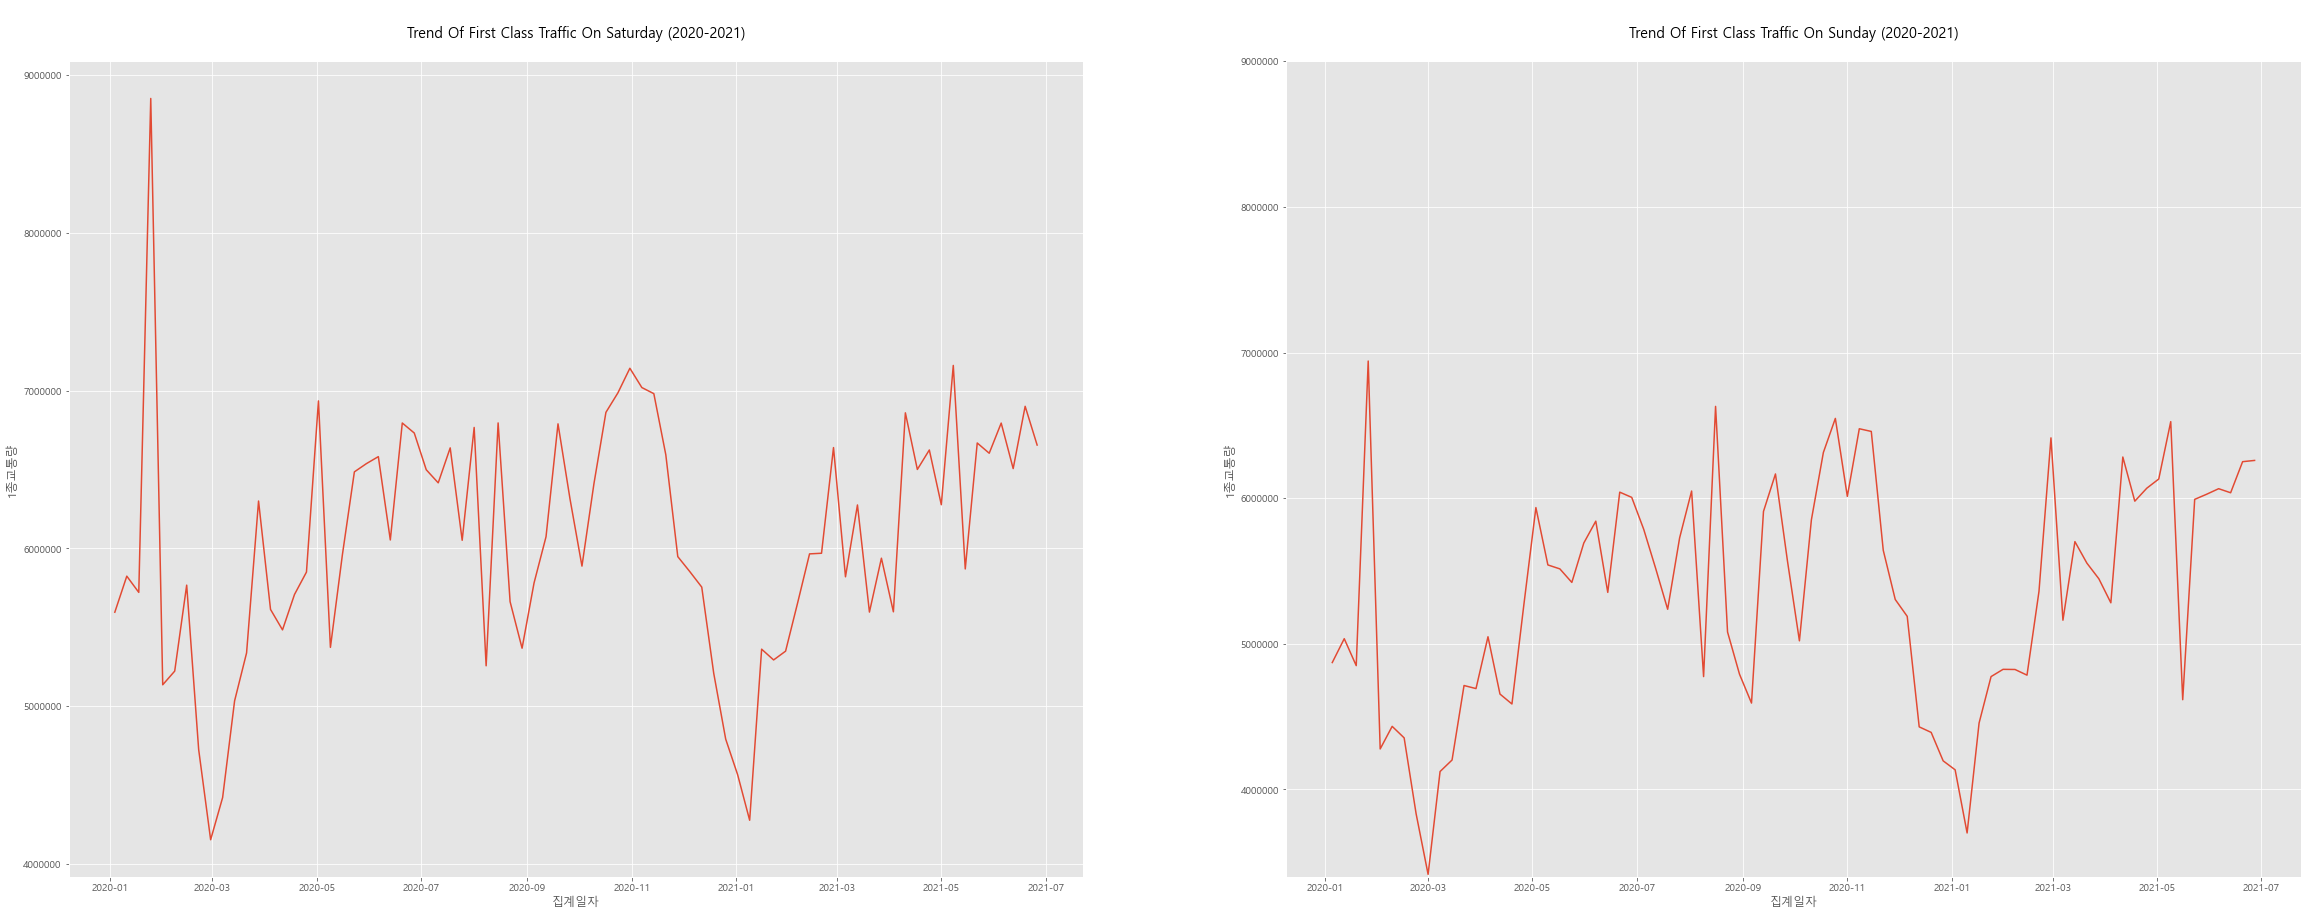

In [17]:
# 요일별 차종 평균 그래프 시각화

fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(40,15)
axes[0].get_yaxis().get_major_formatter().set_scientific(False)
axes[1].get_yaxis().get_major_formatter().set_scientific(False)
plt.ylim(3400000,9000000)

axes[0].set(title='\nTrend Of First Class Traffic On Saturday (2020-2021)\n')
axes[1].set(title='\nTrend Of First Class Traffic On Sunday (2020-2021)\n')

sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.day_of_week=='SAT')], x='집계일자', y='1종교통량', ax=axes[0],)
sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.day_of_week=='SUN')], x='집계일자', y='1종교통량', ax=axes[1])

### 전국 교통량 추이 확인 - 2종 교통량

<AxesSubplot:title={'center':'\nTrend Of Second Class Traffic On Sunday (2020-2021)\n'}, xlabel='집계일자', ylabel='2종교통량'>

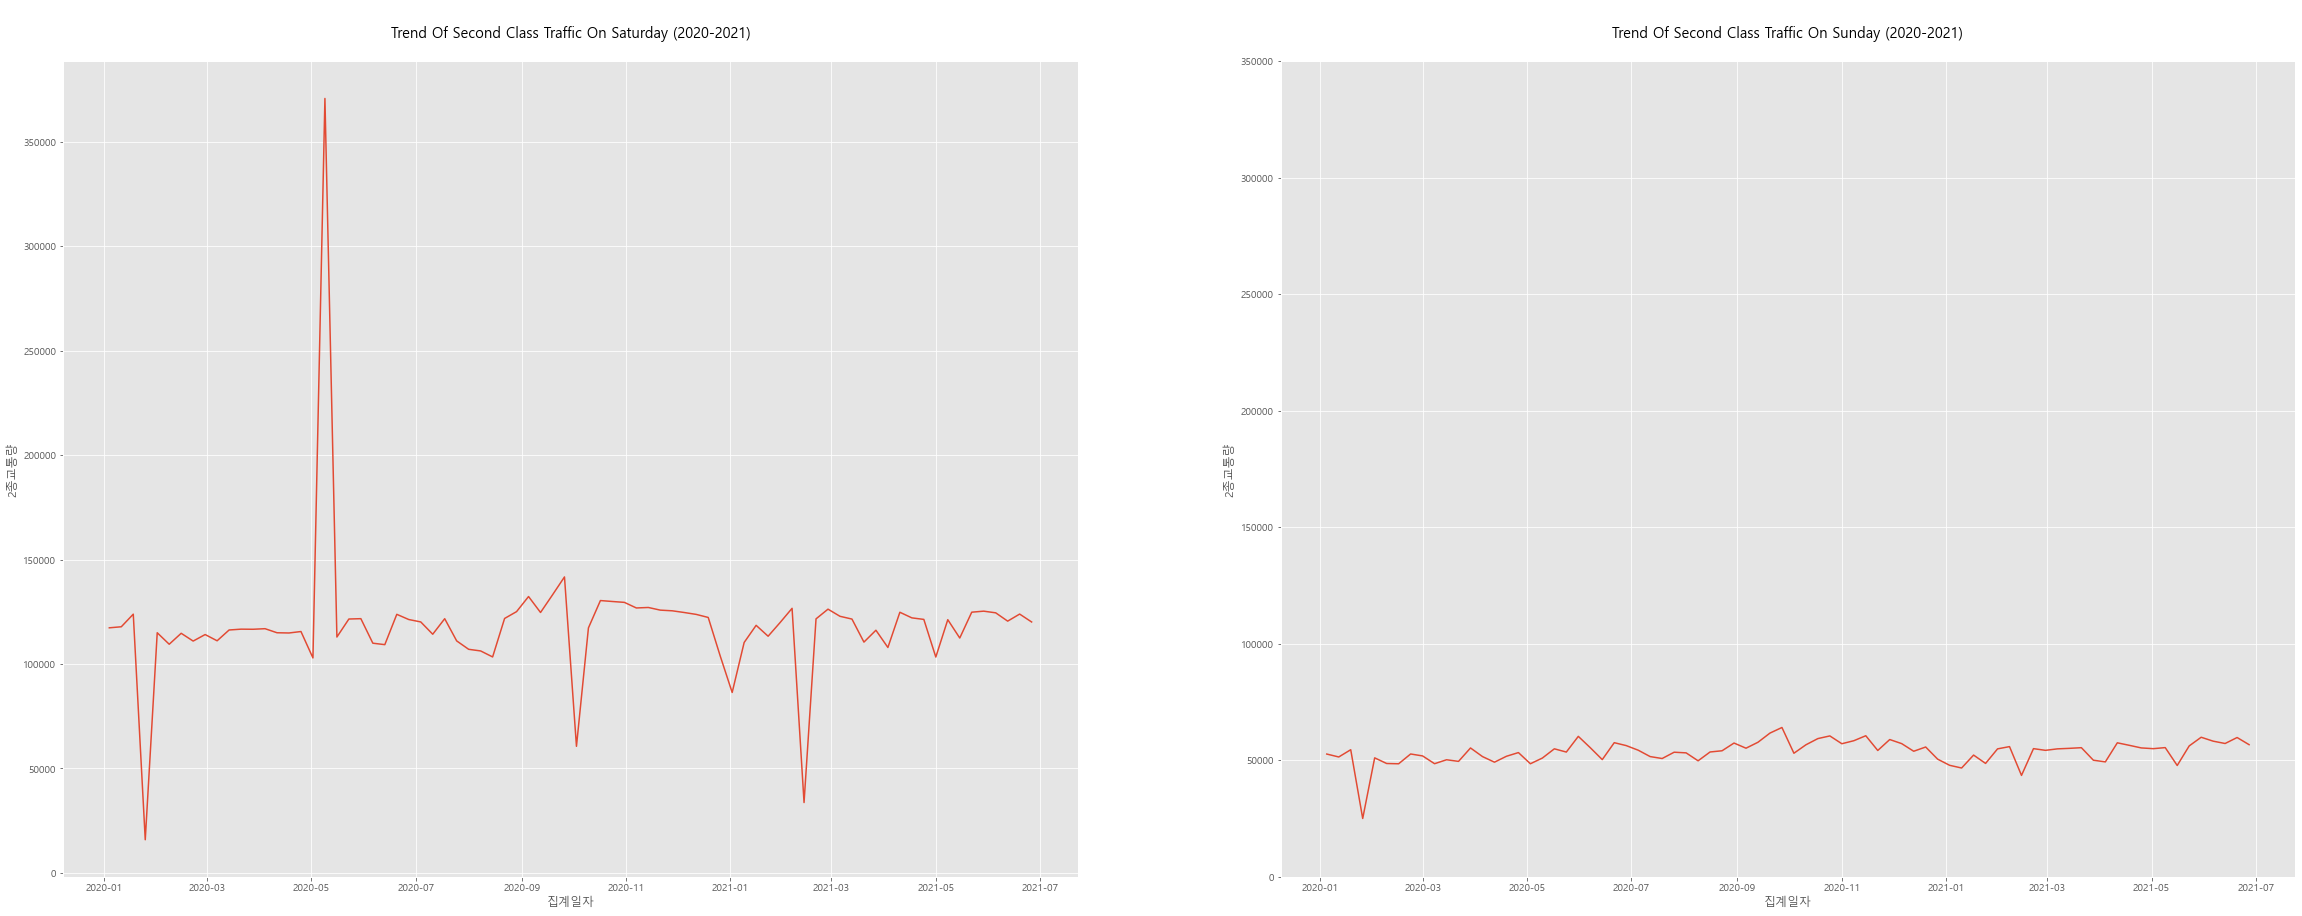

In [18]:
# 요일별 차종 평균 그래프 시각화

fig, axes=plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(40,15)
axes[0].get_yaxis().get_major_formatter().set_scientific(False)
axes[1].get_yaxis().get_major_formatter().set_scientific(False)
plt.ylim(0,350000)

axes[0].set(title='\nTrend Of Second Class Traffic On Saturday (2020-2021)\n')
axes[1].set(title='\nTrend Of Second Class Traffic On Sunday (2020-2021)\n')

sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.day_of_week=='SAT')], x='집계일자', y='2종교통량', ax=axes[0],)
sns.lineplot(data=traffic_data_2020_2021[(traffic_data_total.day_of_week=='SUN')], x='집계일자', y='2종교통량', ax=axes[1])

## 서울 교통량 분석

In [19]:
seoul_traffic_data=traffic_data[(traffic_data['영업소명']=='서서울')|(traffic_data['영업소명']=='동서울')|(traffic_data['영업소명']=='서울')]
seoul_traffic_data=seoul_traffic_data.groupby('집계일자')['1종교통량', '2종교통량','3종교통량', '4종교통량', '5종교통량', '6종교통량', '총교통량'].sum()
seoul_traffic_data=day_of_week(seoul_traffic_data)
seoul_traffic_data.head()

,1종교통량,2종교통량,3종교통량,4종교통량,5종교통량,6종교통량,총교통량,year,month,day_of_week
집계일자,,,,,,,,,,
2018-01-01,422993,5819,20619,2523,1392,18046,471392,2018,1,MON
2018-01-02,412943,17056,29178,11928,9202,22481,502788,2018,1,TUE
2018-01-03,395108,20067,32127,16606,11753,22022,497683,2018,1,WED
2018-01-04,402322,19891,32029,16087,11928,22179,504436,2018,1,THU
2018-01-05,435052,19531,33259,15420,11579,23623,538464,2018,1,FRI


### 서울 1종 교통량